# Locally Linear Embedding

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

## Find k nearest neighbors

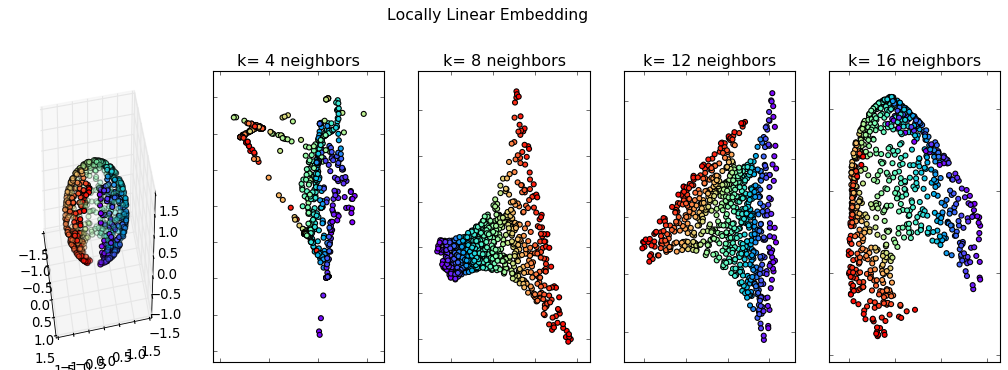

In [24]:
# create our sphere
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# sever the poles from the sphere
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# plot our dataset
fig = plt.figure(figsize=(16, 10))
plt.suptitle("Locally Linear Embedding", fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# perform local linear wmbedding 
neighbors = np.arange(4, 20, 4)

for i, neighbor in enumerate(neighbors):
    trans_data = manifold.LocallyLinearEmbedding(neighbor, 2).fit_transform(sphere_data).T
    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' neighbors')
    plt.axis('tight');
plt.show();

## Local Linear Combinations